

**Dataset:**
<br>
<br>Loan_ID: Unique identifier for the loan application.
<br>Gender: Gender of the applicant (Male/Female).
<br>Married: Marital status of the applicant (Yes/No).
<br>Dependents: Number of dependents of the applicant.
<br>Education: Educational qualification of the applicant (Graduate/Not Graduate).
<br>Self_Employed: Whether the applicant is self-employed (Yes/No).
<br>ApplicantIncome: Income of the applicant.
<br>CoapplicantIncome: Income of the co-applicant.
<br>LoanAmount: Loan amount in thousands.
<br>Loan_Amount_Term: Term of the loan in months.
<br>Credit_History: Credit history meets guidelines (1 for Yes, 0 for No).
<br>Property_Area: Type of property area (Urban/Semiurban/Rural).
<br>Loan_Status: Loan approval status (Y for Yes, N for No).

**Abstract:**

For binary classification, multi classification and regression:
<br>Analyzing the data to check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in 10 different models, finally print the best model's performance.

In [107]:
import pandas as pd
import numpy as np

Importing dataset

In [108]:
train_data = pd.read_csv('https://raw.githubusercontent.com/kakashi3lite/DataScienceEngineeringINFO6105/main/train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/kakashi3lite/DataScienceEngineeringINFO6105/main/test_Y3wMUE5_7gLdaTN.csv')

Installing H20

In [109]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [110]:
train_data.dropna(inplace=True)

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
le=LabelEncoder()

In [113]:
train_data['Married']=le.fit_transform(train_data['Married'])
train_data['Education']=le.fit_transform(train_data['Education'])
train_data['Self_Employed']=le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=le.fit_transform(train_data['Loan_Status'])
train_data['Dependents']=le.fit_transform(train_data['Dependents'])
train_data['Gender']=le.fit_transform(train_data['Gender'])

In [114]:
test_data['Married']=le.fit_transform(test_data['Married'])
test_data['Education']=le.fit_transform(test_data['Education'])
test_data['Self_Employed']=le.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=le.fit_transform(test_data['Property_Area'])
test_data['Dependents']=le.fit_transform(test_data['Dependents'])
test_data['Gender']=le.fit_transform(test_data['Gender'])

In [115]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [116]:
train_data.drop('Loan_ID',axis=1,inplace=True)

In [117]:
pip install h2o


Initiating H20

In [118]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,21 mins 13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_0dqwvs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [119]:
train_data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

Generating Heat Correlation Map

<Axes: >

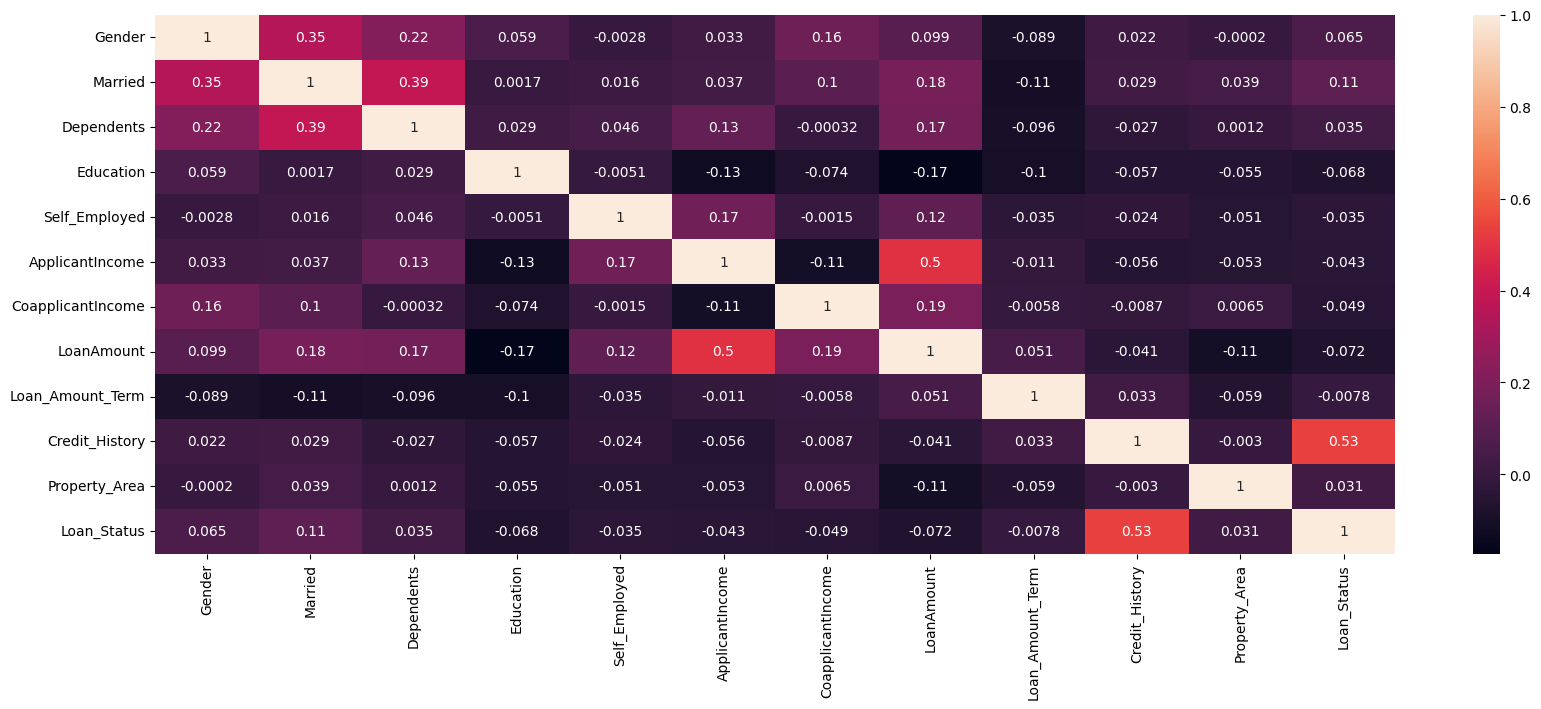

In [121]:
plt.figure(figsize=(20,7))
sns.heatmap(train_data.corr(), annot=True)

Using Predictor Significance

In [122]:
train_data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [123]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(train_data['Loan_Status'], train_data.drop('Loan_Status',axis=1)).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Loan_Status   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              154.9
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                   2.23e-148
Time:                        03:41:18   Log-Likelihood:                         -224.63
No. Observations:                 480   AIC:                                      471.3
Df Residuals:                     469   BIC:                                      517.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.0520      0.049      1.067      0.286      -0.044       0.148
Married               0.0960      0.043      2.239      0.026       0.012       0.180
Dependents            0.0091      0.019      0.469      0.640      -0.029       0.047
Education            -0.0569      0.045     -1.268      0.206      -0.145       0.031
Self_Employed        -0.0191      0.053     -0.363      0.716      -0.123       0.084
ApplicantIncome    7.553e-07   3.79e-06      0.199      0.842   -6.69e-06     8.2e-06
CoapplicantIncome -8.508e-06   7.27e-06     -1.171      0.242   -2.28e-05    5.78e-06
LoanAmount           -0.0004      0.000     -1.403      0.161      -0.001       0.000
Loan_Amount_Term      0.0001      0.000      0.770      0.442      -0.000       0.000
Credit_History        0.6970      0.048     14.557      0.000       0.603       0.791
Property_Area         0.0162      0.022      0.723      0.470      -0.028       0.060
==============================================================================
Omnibus:                       73.098   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.379
Skew:                          -1.106   Prob(JB):                     3.56e-23
Kurtosis:                       3.521   Cond. No.                     2.39e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [127]:
X=train_data.drop('Loan_Status',axis=1)

In [128]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

              feature        VIF
0              Gender   6.129987
1             Married   3.740428
2          Dependents   1.927601
3           Education   1.278478
4       Self_Employed   1.195801
5     ApplicantIncome   2.746996
6   CoapplicantIncome   1.549897
7          LoanAmount   6.392011
8    Loan_Amount_Term  10.738003
9      Credit_History   6.151637
10      Property_Area   2.607900


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [130]:
y=train_data['Loan_Status']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [133]:
from sklearn.linear_model import Ridge

In [134]:
ridge=Ridge()

In [135]:
ridge.fit(X_train,y_train)

Ridge()

In [136]:
y_pred=ridge.predict(X_test)

In [138]:
print(mean_squared_error(y_test,y_pred))

0.1818928689596671


In [139]:
data = h2o.H2OFrame(train_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [140]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [141]:
x = list(set(train.col_names) - set(["Loan_Status"]))

In [142]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MSE")
aml.train(x=x, y="Loan_Status", training_frame=data)

AutoML progress: |
03:57:46.361: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:57:53.997: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:57:54.860: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:57:56.464: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
03:58:00.625: _response param, We have dete

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [143]:
aml.leaderboard

model_id,mse,rmse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_35746,0.154243,0.392737,0.307755,0.274016,0.154243
StackedEnsemble_AllModels_1_AutoML_1_20240220_35746,0.156686,0.395835,0.308891,0.275707,0.156686
GLM_1_AutoML_1_20240220_35746,0.157884,0.397346,0.316857,0.278143,0.157884
DRF_1_AutoML_1_20240220_35746,0.159276,0.399094,0.292269,0.275837,0.159276
GBM_3_AutoML_1_20240220_35746,0.160141,0.400177,0.3124,0.277404,0.160141
GBM_4_AutoML_1_20240220_35746,0.160979,0.401221,0.312605,0.277817,0.160979
GBM_2_AutoML_1_20240220_35746,0.162993,0.403724,0.317351,0.27922,0.162993
XRT_1_AutoML_1_20240220_35746,0.168418,0.410387,0.351072,0.288938,0.168418
XGBoost_3_AutoML_1_20240220_35746,0.178393,0.422366,0.311173,0.289344,0.178393
XGBoost_2_AutoML_1_20240220_35746,0.18856,0.434235,0.321218,0.295342,0.18856


In [145]:
best=aml.leader
best.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.07142971927742069
RMSE: 0.2672633893323601
MAE: 0.21010909938410519
RMSLE: 0.19479315955778773
Mean Residual Deviance: 0.07142971927742069
R^2: 0.641917090829099
Null degrees of freedom: 108
Residual degrees of freedom: 105
Null deviance: 21.862569444444432
Residual deviance: 7.785839401238855
AIC: 31.67310291382544

In [159]:
best

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


### Answers for questions

**Is the relationship significant?**
<br>A: yes, because the R-sqaured is 1 which is very high and all features' p value is 0, so the relationship is very much significant

**Are any model assumptions violated?**
<br>A: no, the model is regression which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**
<br>A: yes, from the VIF data, we could know that Gender, Loan_Amount_Term, Credit_History have correlationship with each other, may be because they are all about the condition of air.

**In the multivariate models are predictor variables independent of all the other predictor variables?**
<br>A: No, they are not all independent of each other, we can know that from the correlation heap map.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
<br>A: As per OLS except married status and Credit_history all the variables are insignificant from the model

**Does the model make sense?**
<br>A: yes, the qustion is a regression question and models in AutoML can deal with it.

**Does regularization help?****
<br>No, the mse from the best model is 0.071 which is very high, however, in regularization, the rmse is 0.18

**Which independent variables are significant?**
<br>Best model does not support feature significance

**Which hyperparameters are important?**
<br>all hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

**Coding professionalism?**
<br>yes.


**Conclusion:**

<br>As per H2O Generized Linear Model is the best performer out of all model.
<br>The dataset has multicollinearity.
<br>The model can't show feature importance because it's not available.

**References:**

<br>1.W3School
<br>2.h2o.ai
<br>3.scikit-learn.org/stable/modules/
<br>4.towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

MIT License

Copyright (c) 2024 Swanand Tanavade

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.